✅ Imports réussis !
📊 Dataset initial : 54 lignes, 11 colonnes


,ID,CV,Email,Téléphone,Code_Postal,Permis,Diplôme,Langues,Mots,Compétences,Liste_Compétences
0,1,CV1.pdf,zadiali159@gmail.com,0650299750,Non trouvé,Permis B,Master,Anglais; Français,265.0,21.0,docker; git; r; mongodb; anglais; machine lear...
1,2,CV10.pdf,Non trouvé,0668114063,93600,Non trouvé,Master,Anglais; Français,494.0,7.0,gestion; r; scikit-learn; anglais; scikit; mac...
2,3,CV11.pdf,Non trouvé,Non trouvé,Non trouvé,Non trouvé,Licence,Anglais; Chinois,659.0,25.0,docker; word; r; mongodb; jupyter; jenkins; an...
3,4,CV12.pdf,Melvine.moubeyi@aivancity.education,0758328589,94230,Non trouvé,Bachelor,Anglais; Français,398.0,24.0,gcp; git; r; seaborn; anglais; machine learnin...
4,5,CV13.pdf,Non trouvé,+33779457896,94200,Non trouvé,Master,Anglais; Français,340.0,17.0,python; office; gestion; r; java; seaborn; ang...


📊 ANALYSE DES VALEURS MANQUANTES

📋 Valeurs manquantes par colonne :


,Colonne,Nb_Manquants,Pourcentage
3,Permis,39,72.22
2,Code_Postal,17,31.48
0,Email,13,24.07
4,Diplôme,11,20.37
1,Téléphone,8,14.81
5,Langues,3,5.56


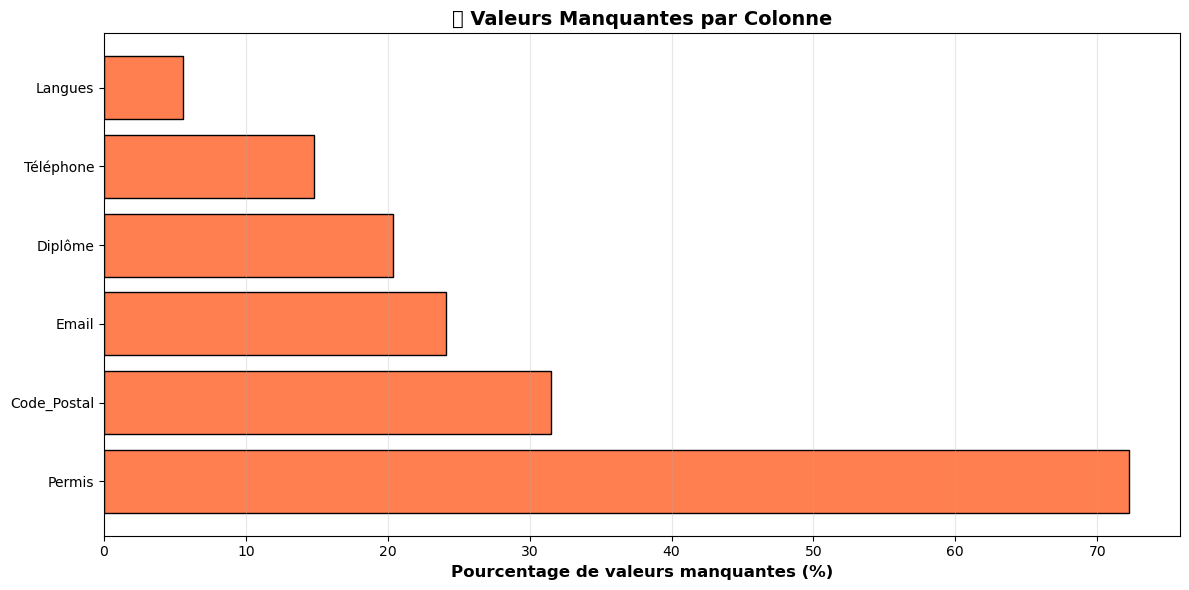


🗑️ SUPPRESSION DES LIGNES VIDES
❌ Lignes complètement vides (Mots = NA) : 0
❌ Lignes avec que des NaN : 0
✅ Dataset après suppression : 54 lignes (0 supprimées au total)

🔢 CONVERSION DES COLONNES NUMÉRIQUES
✅ Colonnes 'Mots' et 'Compétences' converties en numérique
   • Type 'Mots' : float64
   • Type 'Compétences' : float64

🌍 IMPUTATION DES LANGUES
⚠️  Langues manquantes : 3
✅ 3 valeurs remplacées par 'Français'

🚗 IMPUTATION DES PERMIS
⚠️  Permis manquants : 39
✅ 39 valeurs remplacées par 'Non'

🤖 IMPUTATION DES CODES POSTAUX (SMOTE + RandomForest)
📊 CV avec code postal : 37
⚠️  CV sans code postal : 17

🔧 Construction du modèle de prédiction avec SMOTE...
✅ Classes gardées (>=2 exemples) : 7 départements
🧪 Lignes pour entraînement : 26 (sur 37)
🔁 Avant SMOTE : 19 | Après SMOTE : 42 | k_neighbors=1
✅ Accuracy (test) : 42.86%
✅ Codes postaux imputés : 17
🔎 Codes postaux encore manquants : 0

📌 Exemples de prédictions (5) :
   • CV1.pdf                        → Dept: 94 → CP: 94230


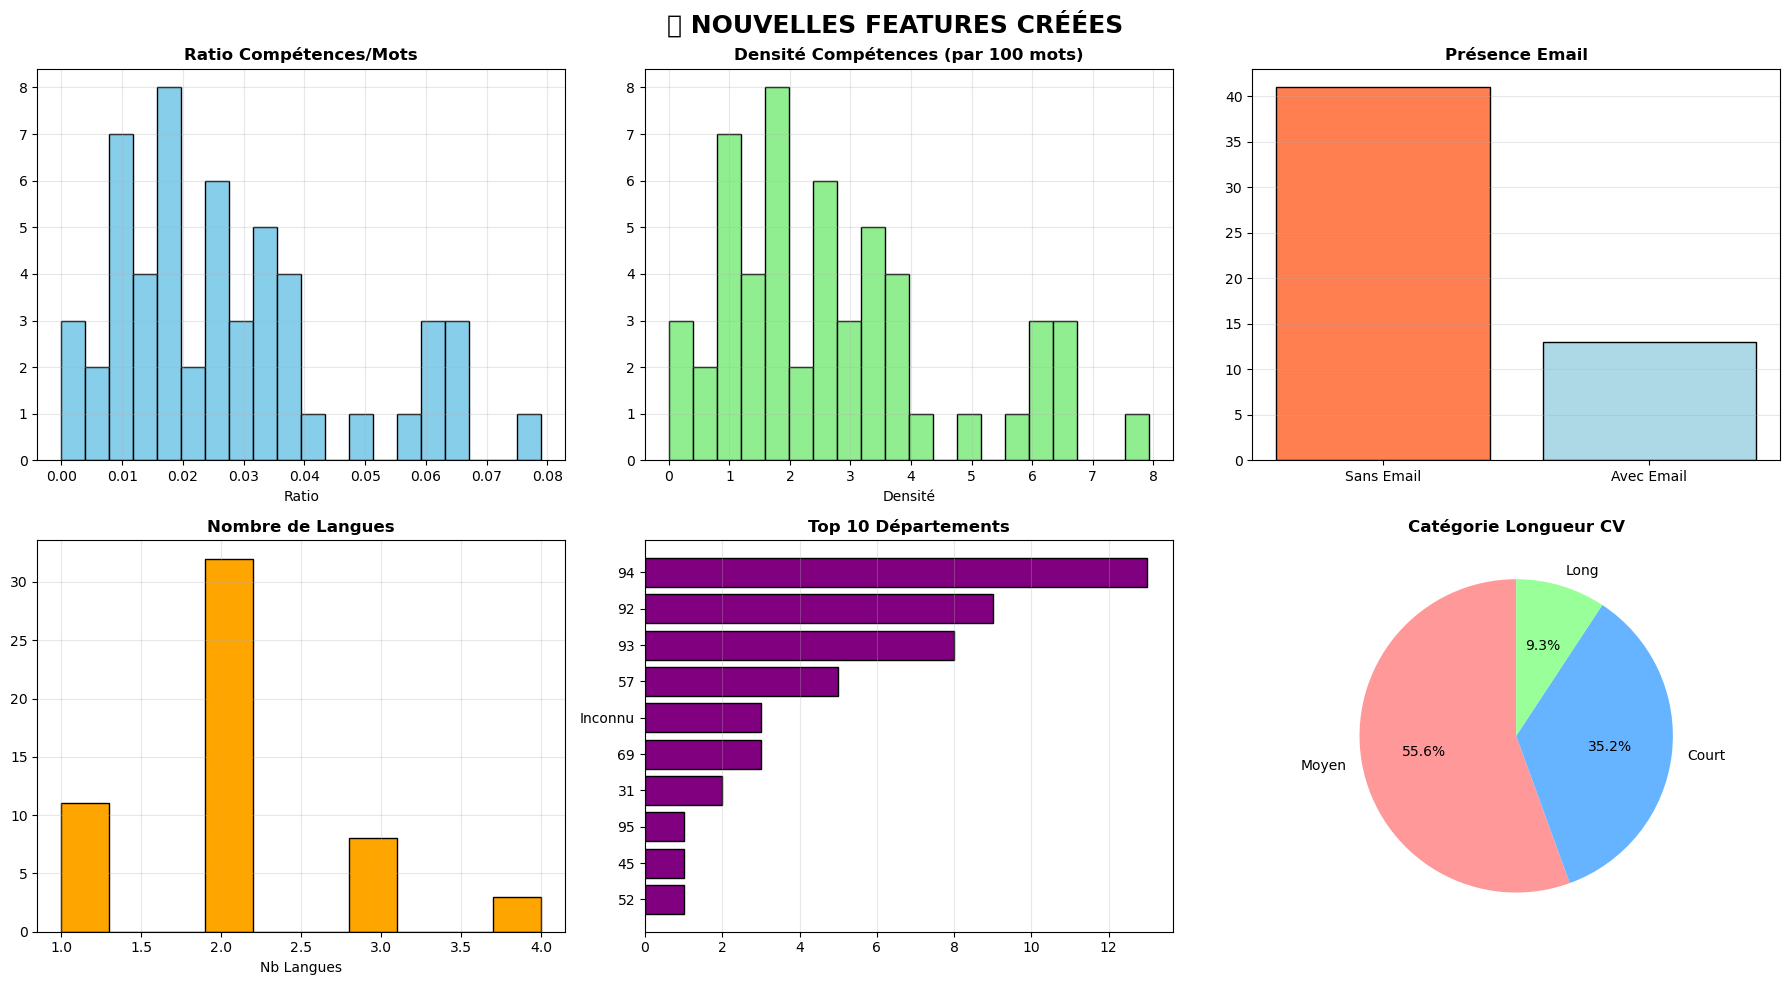

                                   📋 RÉSUMÉ DU PREPROCESSING

🗑️  NETTOYAGE                            │ 📊 RÉSULTAT                              
────────────────────────────────────────────────────────────────────────────────────────────────────
Lignes initiales                         │ 54                                      
Lignes avec Mots=NA supprimées           │ 0                                       
Lignes avec que des NaN supprimées       │ 0                                       
Lignes finales                           │ 54                                      

🔧 IMPUTATION                             │ 📊 RÉSULTAT                              
────────────────────────────────────────────────────────────────────────────────────────────────────
Langues imputées                         │ 3 → 'Français'
Permis imputés                           │ 39 → 'Non'
Codes postaux prédits (ML)               │ 17 prédictions

✨ NOUVELLES FEATURES                     │ 📊 DESCRIPTION    

In [7]:
# %% [markdown]
# # 🧹 PREPROCESSING & FEATURE ENGINEERING
# 
# **Objectif :** Nettoyer et préparer les données pour le Machine Learning
# 
# **Stratégie :**
# - Supprimer les lignes complètement vides
# - Prédire les codes postaux manquants avec un modèle ML
# - Imputer les langues manquantes par "Français"
# - Imputer les permis manquants par "Non"
# 
# **Auteur :** Franck Melvine

# %% [markdown]
# ## 1. 📦 Imports

# %%
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

print("✅ Imports réussis !")

# %% [markdown]
# ## 2. 📂 Chargement des Données

# %%
# Charger le dataset depuis l'exploration
df = pd.read_csv('../data/processed/dataset_cv_clean.csv')

print(f"📊 Dataset initial : {len(df)} lignes, {len(df.columns)} colonnes")
display(df.head())

# %% [markdown]
# ## 3. 🔍 Analyse des Valeurs Manquantes

# %%
print("=" * 80)
print("📊 ANALYSE DES VALEURS MANQUANTES")
print("=" * 80)

# Compter les 'NA' et 'Non trouvé'
na_counts = {}
for col in df.columns:
    na_count = ((df[col] == 'NA') | (df[col] == 'Non trouvé')).sum()
    if na_count > 0:
        na_counts[col] = na_count

na_df = pd.DataFrame(list(na_counts.items()), columns=['Colonne', 'Nb_Manquants'])
na_df['Pourcentage'] = (na_df['Nb_Manquants'] / len(df) * 100).round(2)
na_df = na_df.sort_values('Nb_Manquants', ascending=False)

print("\n📋 Valeurs manquantes par colonne :")
display(na_df)

# Visualisation
plt.figure(figsize=(12, 6))
plt.barh(na_df['Colonne'], na_df['Pourcentage'], color='coral', edgecolor='black')
plt.xlabel('Pourcentage de valeurs manquantes (%)', fontsize=12, fontweight='bold')
plt.title('📊 Valeurs Manquantes par Colonne', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# %% [markdown]
# ## 4. 🗑️ ÉTAPE 1 : Supprimer les Lignes Complètement Vides

# %%
print("\n🗑️ SUPPRESSION DES LIGNES VIDES")
print("=" * 80)

# Identifier les lignes où Mots = 'NA' (lignes complètement vides)
lignes_vides = df['Mots'] == 'NA'
nb_lignes_vides = lignes_vides.sum()

print(f"❌ Lignes complètement vides (Mots = NA) : {nb_lignes_vides}")

# Supprimer ces lignes
df_clean = df[~lignes_vides].copy()

# Supprimer aussi les lignes avec QUE des NaN
nb_avant = len(df_clean)
df_clean = df_clean.dropna(how='all')
nb_nan_lines = nb_avant - len(df_clean)

print(f"❌ Lignes avec que des NaN : {nb_nan_lines}")
print(f"✅ Dataset après suppression : {len(df_clean)} lignes ({len(df) - len(df_clean)} supprimées au total)")

# %% [markdown]
# ## 5. 🔢 Conversion des Colonnes Numériques

# %%
print("\n🔢 CONVERSION DES COLONNES NUMÉRIQUES")
print("=" * 80)

# Convertir Mots et Compétences en numérique
df_clean['Mots'] = pd.to_numeric(df_clean['Mots'], errors='coerce')
df_clean['Compétences'] = pd.to_numeric(df_clean['Compétences'], errors='coerce')

print("✅ Colonnes 'Mots' et 'Compétences' converties en numérique")
print(f"   • Type 'Mots' : {df_clean['Mots'].dtype}")
print(f"   • Type 'Compétences' : {df_clean['Compétences'].dtype}")

# %% [markdown]
# ## 6. 🌍 ÉTAPE 2 : Imputer les Langues Manquantes par "Français"

# %%
print("\n🌍 IMPUTATION DES LANGUES")
print("=" * 80)

nb_langues_manquantes = (df_clean['Langues'] == 'Non trouvé').sum()
print(f"⚠️  Langues manquantes : {nb_langues_manquantes}")

# Remplacer par "Français"
df_clean.loc[df_clean['Langues'] == 'Non trouvé', 'Langues'] = 'Français'

print(f"✅ {nb_langues_manquantes} valeurs remplacées par 'Français'")

# %% [markdown]
# ## 7. 🚗 ÉTAPE 3 : Imputer les Permis Manquants par "Non"

# %%
print("\n🚗 IMPUTATION DES PERMIS")
print("=" * 80)

nb_permis_manquants = (df_clean['Permis'] == 'Non trouvé').sum()
print(f"⚠️  Permis manquants : {nb_permis_manquants}")

# Remplacer par "Non"
df_clean.loc[df_clean['Permis'] == 'Non trouvé', 'Permis'] = 'Non'

print(f"✅ {nb_permis_manquants} valeurs remplacées par 'Non'")

# %% [markdown]
# ## 8. 🤖 ÉTAPE 4 : Prédire les Codes Postaux Manquants avec SMOTE + RandomForest

# %%
from imblearn.over_sampling import SMOTE

print("\n🤖 IMPUTATION DES CODES POSTAUX (SMOTE + RandomForest)")
print("=" * 80)

# Séparer les CV avec et sans code postal
df_with_cp = df_clean[df_clean['Code_Postal'] != 'Non trouvé'].copy()
df_without_cp = df_clean[df_clean['Code_Postal'] == 'Non trouvé'].copy()

print(f"📊 CV avec code postal : {len(df_with_cp)}")
print(f"⚠️  CV sans code postal : {len(df_without_cp)}")

if len(df_with_cp) < 10 or len(df_without_cp) == 0:
    print("ℹ️  Pas assez de données avec CP ou aucun CP manquant → pas d'imputation.")
    print("✅ Tous les codes postaux sont déjà renseignés !")
else:
    print("\n🔧 Construction du modèle de prédiction avec SMOTE...")
    
    # Extraire le département (2 premiers chiffres)
    df_with_cp['Departement'] = df_with_cp['Code_Postal'].astype(str).str[:2]
    
    # --- Features robustes ---
    def create_features_for_cp(df_subset):
        X = pd.DataFrame(index=df_subset.index)
        
        diplomes = df_subset['Diplôme'].fillna('Non trouvé').astype(str)
        langues = df_subset['Langues'].fillna('Français').astype(str)
        email = df_subset['Email'].fillna('Non trouvé').astype(str).str.lower()
        permis = df_subset['Permis'].fillna('Non').astype(str).str.lower()
        
        le = LabelEncoder()
        X['Diplome_Encoded'] = le.fit_transform(diplomes)
        
        X['Nb_Mots'] = pd.to_numeric(df_subset['Mots'], errors='coerce').fillna(0)
        X['Nb_Competences'] = pd.to_numeric(df_subset['Compétences'], errors='coerce').fillna(0)
        X['Ratio_Comp_Mots'] = X['Nb_Competences'] / (X['Nb_Mots'] + 1)
        
        public_domains = ['gmail', 'hotmail', 'outlook', 'yahoo', 'icloud', 'live']
        X['Email_Pro'] = email.apply(lambda x: 0 if (x == 'non trouvé' or any(d in x for d in public_domains)) else 1)
        
        def count_lang(s):
            s = str(s).strip()
            if s in ['non trouvé', 'nan', 'none', '']:
                return 1
            parts = [p.strip() for p in s.split(';') if p.strip()]
            return max(1, len(parts))
        
        X['Nb_Langues'] = langues.apply(count_lang)
        X['A_Permis'] = permis.apply(lambda x: 1 if 'permis' in x else 0)
        
        return X
    
    X = create_features_for_cp(df_with_cp)
    y = df_with_cp['Departement']
    
    # --- Enlever classes avec 1 exemple (SMOTE ne peut pas) ---
    counts = y.value_counts()
    keep_classes = counts[counts >= 2].index
    mask = y.isin(keep_classes)
    
    X2 = X[mask].copy()
    y2 = y[mask].copy()
    
    print(f"✅ Classes gardées (>=2 exemples) : {y2.nunique()} départements")
    print(f"🧪 Lignes pour entraînement : {len(X2)} (sur {len(X)})")
    
    if y2.nunique() < 2:
        print("❌ Trop peu de départements exploitables pour un modèle + SMOTE.")
    else:
        # Split
        X_train, X_test, y_train, y_test = train_test_split(
            X2, y2, test_size=0.25, random_state=42
        )
        
        # --- SMOTE sur train uniquement ---
        min_count = y_train.value_counts().min()
        k = max(1, min(5, min_count - 1))
        
        smote = SMOTE(random_state=42, k_neighbors=k)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
        
        print(f"🔁 Avant SMOTE : {len(X_train)} | Après SMOTE : {len(X_train_res)} | k_neighbors={k}")
        
        # Modèle
        model = RandomForestClassifier(
            n_estimators=400,
            random_state=42,
            max_depth=12,
            class_weight=None  # SMOTE équilibre déjà
        )
        model.fit(X_train_res, y_train_res)
        
        # Eval
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"✅ Accuracy (test) : {acc:.2%}")
        
        # --- Prédire dept pour CP manquants ---
        X_missing = create_features_for_cp(df_without_cp)
        dept_pred = model.predict(X_missing)
        
        # --- Remplir CP avec un CP réel de la base (le plus fréquent du dept) ---
        dept_to_cps = (
            df_with_cp.groupby('Departement')['Code_Postal']
            .apply(lambda s: list(s.astype(str).unique()))
            .to_dict()
        )
        
        most_freq_cp_global = df_with_cp['Code_Postal'].astype(str).value_counts().idxmax()
        
        def pick_cp_most_freq(dept):
            sub = df_with_cp[df_with_cp['Departement'] == dept]['Code_Postal'].astype(str)
            if len(sub) == 0:
                return most_freq_cp_global
            return sub.value_counts().idxmax()
        
        cp_filled = [pick_cp_most_freq(d) for d in dept_pred]
        df_without_cp['Code_Postal'] = cp_filled
        
        # Fusion finale
        df_clean = pd.concat([df_with_cp.drop(columns=['Departement']), df_without_cp], ignore_index=True)
        
        remaining = (df_clean['Code_Postal'] == 'Non trouvé').sum()
        print(f"✅ Codes postaux imputés : {len(df_without_cp)}")
        print(f"🔎 Codes postaux encore manquants : {remaining}")
        
        print("\n📌 Exemples de prédictions (5) :")
        for i in range(min(5, len(df_without_cp))):
            cv_name = df_without_cp.iloc[i]['CV']
            print(f"   • {cv_name:30s} → Dept: {dept_pred[i]} → CP: {cp_filled[i]}")

print(f"\n✅ Dataset final : {len(df_clean)} lignes avec codes postaux complets")

# %% [markdown]
# ## 9. 🔧 FEATURE ENGINEERING - Nouvelles Features

# %%
print("\n🔧 CRÉATION DE NOUVELLES FEATURES")
print("=" * 80)

# 1. Département (depuis code postal)
df_clean['Departement'] = df_clean['Code_Postal'].astype(str).apply(
    lambda x: x[:2] if x not in ['Non trouvé', 'nan', 'None'] and len(x) >= 2 else 'Inconnu'
)
print("✅ Feature 'Departement' créée")

# 2. Ratio Compétences/Mots (densité de compétences)
df_clean['Ratio_Comp_Mots'] = (df_clean['Compétences'] / (df_clean['Mots'] + 1)).fillna(0)
print("✅ Feature 'Ratio_Comp_Mots' créée")

# 3. Densité de compétences (compétences par 100 mots)
df_clean['Densite_Competences'] = (df_clean['Compétences'] / df_clean['Mots'] * 100).fillna(0)
print("✅ Feature 'Densite_Competences' créée")

# 4. A un email valide (binaire)
df_clean['A_Email'] = (df_clean['Email'] != 'Non trouvé').astype(int)
print("✅ Feature 'A_Email' créée")

# 5. A un téléphone valide (binaire)
df_clean['A_Telephone'] = (df_clean['Téléphone'] != 'Non trouvé').astype(int)
print("✅ Feature 'A_Telephone' créée")

# 6. A un permis (binaire)
df_clean['A_Permis'] = (df_clean['Permis'] != 'Non').astype(int)
print("✅ Feature 'A_Permis' créée")

# 7. Nombre de langues
df_clean['Nb_Langues'] = df_clean['Langues'].astype(str).apply(
    lambda x: len(x.split('; ')) if x not in ['Non trouvé', 'nan', 'None', ''] else 1
)
print("✅ Feature 'Nb_Langues' créée")

# 8. Nombre de compétences techniques (approximation)
def compter_comp_tech(comp_str):
    comp_str = str(comp_str)  # Convertir en string
    if comp_str in ['Aucune', 'NA', 'nan', 'None', '']:
        return 0
    competences = comp_str.split('; ')
    tech_keywords = ['python', 'sql', 'java', 'javascript', 'docker', 'aws', 'azure', 
                     'machine learning', 'deep learning', 'tensorflow', 'pytorch']
    return sum(1 for comp in competences if any(kw in comp.lower() for kw in tech_keywords))

df_clean['Nb_Comp_Tech'] = df_clean['Liste_Compétences'].apply(compter_comp_tech)
print("✅ Feature 'Nb_Comp_Tech' créée")

# 9. Catégorie de longueur CV
def categoriser_longueur(mots):
    if pd.isna(mots):
        return 'Court'
    elif mots < 300:
        return 'Court'
    elif mots < 600:
        return 'Moyen'
    else:
        return 'Long'

df_clean['Categorie_Longueur'] = df_clean['Mots'].apply(categoriser_longueur)
print("✅ Feature 'Categorie_Longueur' créée")

print(f"\n📊 Dataset avec nouvelles features : {len(df_clean)} lignes, {len(df_clean.columns)} colonnes")

# %% [markdown]
# ## 10. 📊 Visualisation des Nouvelles Features

# %%
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('📊 NOUVELLES FEATURES CRÉÉES', fontsize=18, fontweight='bold')

# 1. Distribution Ratio Compétences/Mots
axes[0, 0].hist(df_clean['Ratio_Comp_Mots'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Ratio Compétences/Mots', fontweight='bold')
axes[0, 0].set_xlabel('Ratio')
axes[0, 0].grid(alpha=0.3)

# 2. Distribution Densité Compétences
axes[0, 1].hist(df_clean['Densite_Competences'], bins=20, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Densité Compétences (par 100 mots)', fontweight='bold')
axes[0, 1].set_xlabel('Densité')
axes[0, 1].grid(alpha=0.3)

# 3. Répartition A_Email
email_counts = df_clean['A_Email'].value_counts()
axes[0, 2].bar(['Sans Email', 'Avec Email'], email_counts.values, color=['coral', 'lightblue'], edgecolor='black')
axes[0, 2].set_title('Présence Email', fontweight='bold')
axes[0, 2].grid(alpha=0.3, axis='y')

# 4. Répartition Nb_Langues
axes[1, 0].hist(df_clean['Nb_Langues'], bins=10, color='orange', edgecolor='black')
axes[1, 0].set_title('Nombre de Langues', fontweight='bold')
axes[1, 0].set_xlabel('Nb Langues')
axes[1, 0].grid(alpha=0.3)

# 5. Top Départements
dept_counts = df_clean['Departement'].value_counts().head(10)
axes[1, 1].barh(dept_counts.index, dept_counts.values, color='purple', edgecolor='black')
axes[1, 1].set_title('Top 10 Départements', fontweight='bold')
axes[1, 1].invert_yaxis()
axes[1, 1].grid(alpha=0.3, axis='x')

# 6. Catégorie Longueur CV
cat_counts = df_clean['Categorie_Longueur'].value_counts()
axes[1, 2].pie(cat_counts.values, labels=cat_counts.index, autopct='%1.1f%%', startangle=90,
               colors=['#ff9999', '#66b3ff', '#99ff99'])
axes[1, 2].set_title('Catégorie Longueur CV', fontweight='bold')

plt.tight_layout()
plt.show()

# %% [markdown]
# ## 11. 📋 Résumé du Preprocessing

# %%
print("=" * 100)
print(" " * 35 + "📋 RÉSUMÉ DU PREPROCESSING")
print("=" * 100)

print(f"\n{'🗑️  NETTOYAGE':<40} │ {'📊 RÉSULTAT':<40}")
print("─" * 100)
print(f"{'Lignes initiales':<40} │ {len(df):<40}")
print(f"{'Lignes avec Mots=NA supprimées':<40} │ {nb_lignes_vides:<40}")
print(f"{'Lignes avec que des NaN supprimées':<40} │ {nb_nan_lines:<40}")
print(f"{'Lignes finales':<40} │ {len(df_clean):<40}")

print(f"\n{'🔧 IMPUTATION':<40} │ {'📊 RÉSULTAT':<40}")
print("─" * 100)
print(f"{'Langues imputées':<40} │ {nb_langues_manquantes} → 'Français'")
print(f"{'Permis imputés':<40} │ {nb_permis_manquants} → 'Non'")
if len(df_without_cp) > 0:
    print(f"{'Codes postaux prédits (ML)':<40} │ {len(df_without_cp)} prédictions")

print(f"\n{'✨ NOUVELLES FEATURES':<40} │ {'📊 DESCRIPTION':<40}")
print("─" * 100)
print(f"{'Departement':<40} │ {'Extrait du code postal':<40}")
print(f"{'Ratio_Comp_Mots':<40} │ {'Compétences / Mots':<40}")
print(f"{'Densite_Competences':<40} │ {'Compétences par 100 mots':<40}")
print(f"{'A_Email, A_Telephone, A_Permis':<40} │ {'Variables binaires':<40}")
print(f"{'Nb_Langues':<40} │ {'Nombre de langues parlées':<40}")
print(f"{'Nb_Comp_Tech':<40} │ {'Compétences techniques':<40}")
print(f"{'Categorie_Longueur':<40} │ {'Court/Moyen/Long':<40}")

print(f"\n{'📊 DATASET FINAL':<40} │ {'📊 VALEUR':<40}")
print("─" * 100)
print(f"{'Nombre de lignes':<40} │ {len(df_clean):<40}")
print(f"{'Nombre de colonnes':<40} │ {len(df_clean.columns):<40}")
print(f"{'Taux de complétion':<40} │ {(len(df_clean)/len(df)*100):.1f}%")

print("\n" + "=" * 100)
print("✅ PREPROCESSING TERMINÉ - DATASET PRÊT POUR LE ML")
print("=" * 100)

# %% [markdown]
# ## 12. 💾 Sauvegarde du Dataset Nettoyé

# %%
# Sauvegarder le dataset preprocessed
chemin_sortie = "../data/processed/dataset_cv_preprocessed.csv"
df_clean.to_csv(chemin_sortie, index=False, encoding='utf-8-sig')
print(f"✅ Dataset preprocessed sauvegardé : {chemin_sortie}")

# Afficher les colonnes finales
print(f"\n📋 Colonnes du dataset final :")
for i, col in enumerate(df_clean.columns, 1):
    print(f"   {i:2d}. {col}")

# %% [markdown]
# ---
# ## 🎯 PROCHAINES ÉTAPES
# 
# ✅ **Preprocessing terminé !**
# 
# **Suite du projet :**
# 1. 🤖 **Modélisation ML** - Classification, Clustering
# 2. 📊 **Évaluation** - Métriques de performance
# 3. 🚀 **Déploiement** - Dashboard Streamlit / API

In [10]:
import pandas as pd
df = pd.read_csv('../data/processed/dataset_cv_preprocessed.csv')
print(f"📊 Dataset : {len(df)} lignes × {len(df.columns)} colonnes")
display(df.head(10))

📊 Dataset : 54 lignes × 20 colonnes


,ID,CV,Email,Téléphone,Code_Postal,Permis,Diplôme,Langues,Mots,Compétences,Liste_Compétences,Departement,Ratio_Comp_Mots,Densite_Competences,A_Email,A_Telephone,A_Permis,Nb_Langues,Nb_Comp_Tech,Categorie_Longueur
0,2,CV10.pdf,Non trouvé,0668114063,93600.0,Non,Master,Anglais; Français,494.0,7.0,gestion; r; scikit-learn; anglais; scikit; mac...,93,0.014141,1.417004,0,1,0,2,1,Moyen
1,4,CV12.pdf,Melvine.moubeyi@aivancity.education,0758328589,94230.0,Non,Bachelor,Anglais; Français,398.0,24.0,gcp; git; r; seaborn; anglais; machine learnin...,94,0.060150,6.030151,1,1,0,2,4,Moyen
2,5,CV13.pdf,Non trouvé,+33779457896,94200.0,Non,Master,Anglais; Français,340.0,17.0,python; office; gestion; r; java; seaborn; ang...,94,0.049853,5.000000,0,1,0,2,5,Moyen
3,6,CV14.pdf,mouketoudielowen@gmail.com,0619412532,94200.0,Permis A; Permis D,Baccalauréat,Anglais; Français,554.0,36.0,office; git; aws; r; seaborn; anglais; machine...,94,0.064865,6.498195,1,1,1,2,9,Moyen
4,7,CV15.pdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inconnu,0.000000,0.000000,1,1,1,1,0,Court
5,9,CV17.pdf,mouketoudielowen@gmail.com,+33619412532,94200.0,Non,Baccalauréat,Anglais; Français,335.0,11.0,gestion; office; office 365; crm; organisation...,94,0.032738,3.283582,1,1,0,2,0,Moyen
6,10,CV18.pdf,owen.mouketou@aivancity.education,+33619412532,94200.0,Permis E,Bachelor,Anglais; Français,394.0,24.0,office; r; seaborn; anglais; scrum; machine le...,94,0.060759,6.091371,1,1,1,2,3,Moyen
7,12,CV2.pdf,Melvine.moubeyi@aivancity.education,0758328589,94230.0,Non,Bachelor,Anglais; Français,726.0,27.0,gcp; git; r; seaborn; anglais; machine learnin...,94,0.037139,3.719008,1,1,0,2,4,Long
8,13,CV20.pdf,mouketoudielowen@gmail.com,0619412532,94200.0,Non,Bachelor,Anglais; Français,393.0,25.0,office; r; seaborn; anglais; scrum; machine le...,94,0.063452,6.361323,1,1,0,2,4,Moyen
9,14,CV21.pdf,kendrickmabiala@mail.com,+33780810722,93160.0,Non,Non trouvé,Français,329.0,10.0,tableau; python; gestion; r; bi; communication...,93,0.030303,3.039514,1,1,0,1,1,Moyen
